# IPL Auction Prediction

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
df=pd.read_csv('IPL.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [26]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS',
              'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
              'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS',
              'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [27]:
cat_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
ipl_auction_encoded_df = pd.get_dummies(df[X_features], columns=cat_features, drop_first=True)
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [28]:
X=ipl_auction_encoded_df
y=df['SOLD PRICE']

In [29]:
from sklearn.preprocessing import StandardScaler
x_scaler=StandardScaler()
x_scaled=x_scaler.fit_transform(X)
y=(y-y.mean())/y.std()

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
ipl_coef=pd.DataFrame({'columns':ipl_auction_encoded_df.columns,'coef':lr.coef_})
print(ipl_coef)

                   columns      coef
0                   T-RUNS -0.000086
1                   T-WKTS  0.000065
2               ODI-RUNS-S  0.000136
3                 ODI-SR-B -0.001631
4                 ODI-WKTS  0.001341
5                ODI-SR-BL -0.003150
6                   RUNS-S  0.000112
7                       HS -0.005630
8                      AVE  0.037069
9                     SR-B -0.002657
10                  SIXERS  0.007275
11                  RUNS-C -0.000257
12                    WKTS  0.017753
13                  AVE-BL  0.001006
14                    ECON  0.025890
15                   SR-BL  0.006766
16                   AGE_2 -0.412260
17                   AGE_3 -0.516060
18             COUNTRY_BAN -0.239972
19             COUNTRY_ENG  1.456206
20             COUNTRY_IND  0.418903
21              COUNTRY_NZ  0.237317
22             COUNTRY_PAK  0.283959
23              COUNTRY_SA  0.188848
24              COUNTRY_SL -0.012130
25              COUNTRY_WI -0.079318
2

In [33]:
sort_coef=ipl_coef.sort_values('coef',ascending=False)
print(sort_coef)

                   columns      coef
19             COUNTRY_ENG  1.456206
20             COUNTRY_IND  0.418903
30         CAPTAINCY EXP_1  0.349913
27    PLAYING ROLE_Batsman  0.348577
22             COUNTRY_PAK  0.283959
21              COUNTRY_NZ  0.237317
23              COUNTRY_SA  0.188848
8                      AVE  0.037069
14                    ECON  0.025890
12                    WKTS  0.017753
10                  SIXERS  0.007275
15                   SR-BL  0.006766
4                 ODI-WKTS  0.001341
13                  AVE-BL  0.001006
2               ODI-RUNS-S  0.000136
6                   RUNS-S  0.000112
1                   T-WKTS  0.000065
0                   T-RUNS -0.000086
11                  RUNS-C -0.000257
3                 ODI-SR-B -0.001631
9                     SR-B -0.002657
5                ODI-SR-BL -0.003150
7                       HS -0.005630
24              COUNTRY_SL -0.012130
29  PLAYING ROLE_W. Keeper -0.026050
26             COUNTRY_ZIM -0.049791
2

<Axes: xlabel='coef', ylabel='columns'>

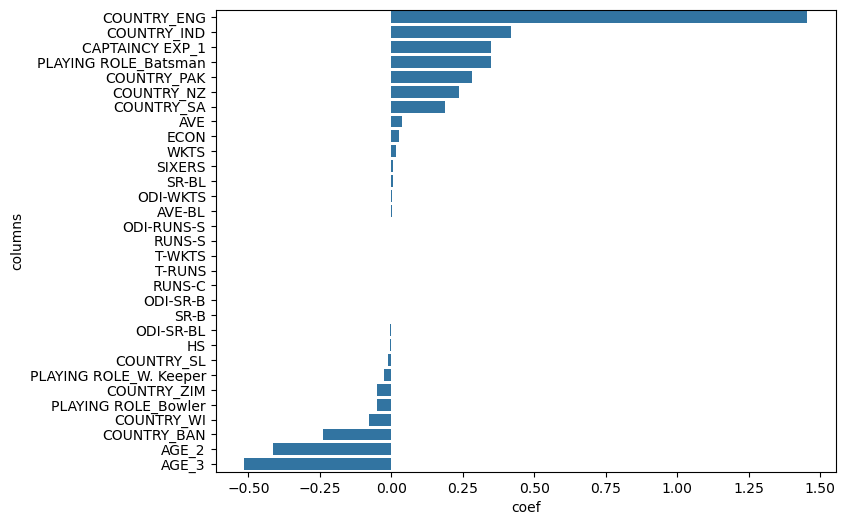

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x='coef',y='columns',data=sort_coef)

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math
y_prdict_train=lr.predict(x_train)
y_predict_test=lr.predict(x_test)
print('mean squred error',mean_squared_error(y_test,y_predict_test))
print('mean absolute error',mean_absolute_error(y_test,y_predict_test))
print('RMSE:',math.sqrt(mean_squared_error(y_test,y_predict_test)))
print('r2 score',r2_score(y_test,y_predict_test))

mean squred error 0.7343090287041965
mean absolute error 0.6277886352748481
RMSE: 0.8569183325756291
r2 score 0.25337599734100247


In [41]:
def get_rmse_test_train(model):
    y_predtrain=model.predict(x_train)
    rmse_train=np.sqrt(mean_squared_error(y_train,y_predtrain))

    y_predtest=model.predict(x_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_predtest))

    print('mean squred error',mean_squared_error(y_test,y_predtest))
    print('mean absolute error',mean_absolute_error(y_test,y_predtest))
   
    print('r2 score',r2_score(y_test,y_predtest))
    print(f"Training RMSE: {rmse_train}")
    print(f"Test RMSE: {rmse_test}")
    return rmse_train, rmse_test

get_rmse_test_train(lr)

mean squred error 0.7343090287041965
mean absolute error 0.6277886352748481
r2 score 0.25337599734100247
Training RMSE: 0.6617551644885995
Test RMSE: 0.8569183325756291


(0.6617551644885995, 0.8569183325756291)

In [37]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
ridge=Ridge(alpha=1,max_iter=500)
ridge.fit(x_train,y_train)
get_rmse_test_train(ridge)

Test RMSE: 0.8809240511186267


(0.6669317518823723, 0.8809240511186267)

In [38]:
Lasso=Lasso(alpha=1,max_iter=500)
Lasso.fit(x_train,y_train)
get_rmse_test_train(Lasso)

Test RMSE: 0.8541889368933011


(0.7997858719292061, 0.8541889368933011)

In [39]:
lasso_coef=pd.DataFrame({'colums':ipl_auction_encoded_df.columns,'coef':Lasso.coef_})
print(lasso_coef)

                    colums      coef
0                   T-RUNS -0.000081
1                   T-WKTS  0.000367
2               ODI-RUNS-S  0.000135
3                 ODI-SR-B  0.000000
4                 ODI-WKTS  0.000000
5                ODI-SR-BL -0.000000
6                   RUNS-S  0.000514
7                       HS -0.000000
8                      AVE  0.006016
9                     SR-B -0.000000
10                  SIXERS  0.000000
11                  RUNS-C  0.000374
12                    WKTS  0.000000
13                  AVE-BL  0.005565
14                    ECON  0.000000
15                   SR-BL  0.000000
16                   AGE_2  0.000000
17                   AGE_3 -0.000000
18             COUNTRY_BAN -0.000000
19             COUNTRY_ENG  0.000000
20             COUNTRY_IND  0.000000
21              COUNTRY_NZ  0.000000
22             COUNTRY_PAK  0.000000
23              COUNTRY_SA -0.000000
24              COUNTRY_SL -0.000000
25              COUNTRY_WI -0.000000
2

In [40]:
en=ElasticNet(alpha=1.01,l1_ratio=0.001,max_iter=500)
en.fit(x_train,y_train)
get_rmse_test_train(en)

Test RMSE: 0.9492697652458431


(0.744194444800764, 0.9492697652458431)